In [1]:
from __future__ import print_function

import numpy as np
import time
from keras.preprocessing.image import save_img
from keras.applications import vgg16
from keras import backend as K
from keras.models import load_model

import matplotlib.pyplot as plt


# dimensions of the generated pictures for each filter.
#img_width = 128
#img_height = 128

# the name of the layer we want to visualize
# (see model definition at keras/applications/vgg16.py)
layer_name = 'conv1d_1'

# util function to convert a tensor into a valid image

# build the VGG16 network with ImageNet weights

#model = load_model('models/conv_dense_k5_f8__5f_3_2_28PM_Dec_06_2018-292-16.87.hdf5')

print('Model loaded.')

#model.summary()


Using TensorFlow backend.


Model loaded.


In [5]:
model = load_model('resultsCV/best_models/conv_dense_k5_f8__5f_8_3_50PM_Dec_06_2018-289-4.21.hdf5')

input_prof = model.input[0]
prof_len = 736
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())


In [6]:
kept_filters = []
layer_name = 'conv1d_4'
for filter_index in range(8):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :])
    else:
        loss = K.mean(layer_output[:, :, filter_index])


    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_prof)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_prof], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_prof_data = np.random.random((1, 1, prof_len))
    else:
        input_prof_data = np.random.random((1, prof_len, 1))
    #input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(1000):
        loss_value, grads_value = iterate([input_prof_data])
        input_prof_data += grads_value * step

        #print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        #img = deprocess_image(input_img_data[0])
        kept_filters.append((input_prof_data[0], loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))


Processing filter 0
Filter 0 processed in 1s
Processing filter 1
Filter 1 processed in 1s
Processing filter 2
Filter 2 processed in 1s
Processing filter 3
Filter 3 processed in 1s
Processing filter 4
Filter 4 processed in 1s
Processing filter 5
Filter 5 processed in 0s
Processing filter 6
Filter 6 processed in 1s
Processing filter 7
Filter 7 processed in 1s


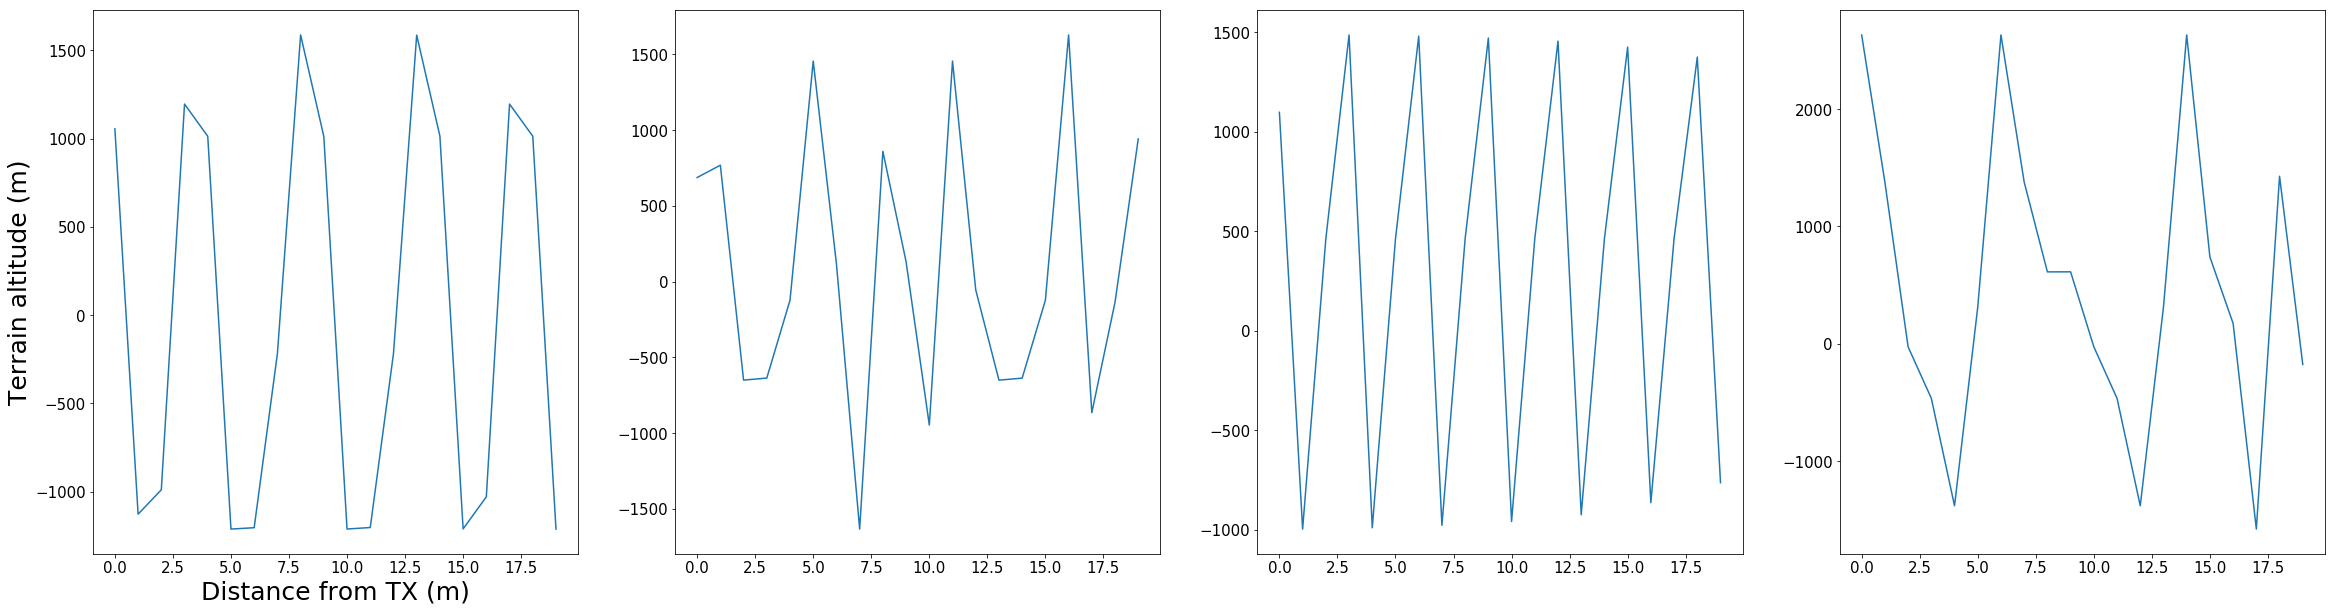

In [27]:
m = len(kept_filters)
fig, ax = plt.subplots(1,4, figsize=(40,10))
k0=0
k=20
for i in range(4):
    ax[i].plot(np.arange(k), kept_filters[i][0][k0:k0+k], label=kept_filters[i][1])
    ax[i].tick_params(labelsize = 15)
    if i==0:
        ax[i].set_xlabel('Distance from TX (m)',fontsize=25)
        ax[i].set_ylabel('Terrain altitude (m)',fontsize=25)
        
    #ax[0,i].legend()
# for i in range(m-4):
#     ax[1,i].plot(np.arange(k),kept_filters[i+4][0][k0:k0+k], label=kept_filters[i+4][1])
    #ax[1,i].legend()
    

plt.savefig('filters.pdf')
plt.show()

In [23]:
guardar.append(kept_filters[2])

In [5]:
guardar = []
guardar.append(kept_filters[4])
guardar.append(kept_filters[5])

Processing filter 0
Filter 0 processed in 1s
Processing filter 1
Filter 1 processed in 0s
Processing filter 2
Filter 2 processed in 1s
Processing filter 3
Filter 3 processed in 1s
Processing filter 4
Filter 4 processed in 1s
Processing filter 5
Filter 5 processed in 1s
Processing filter 6
Filter 6 processed in 1s
Processing filter 7
Filter 7 processed in 1s


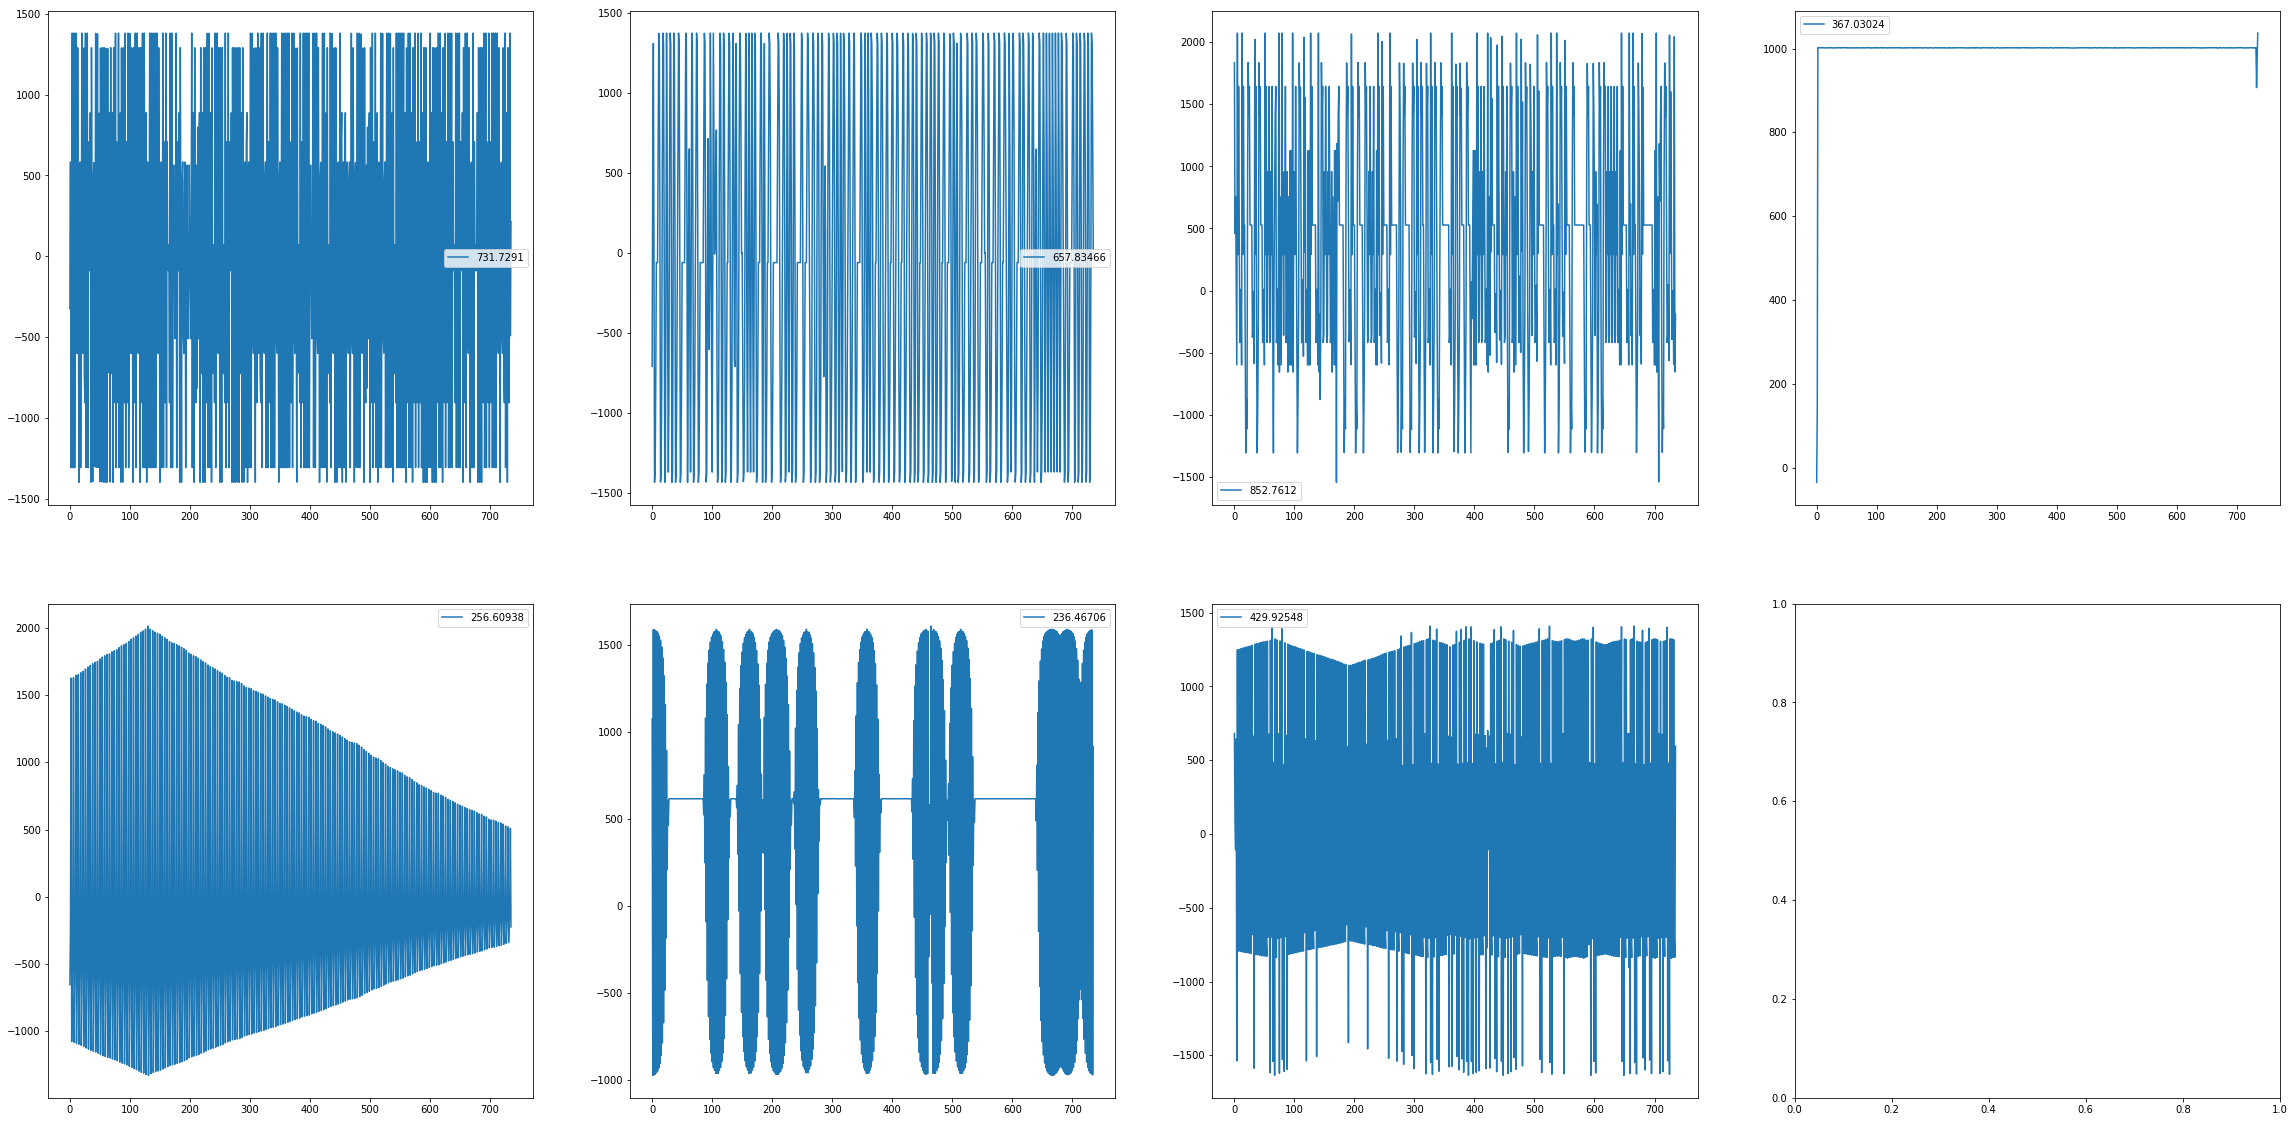

In [10]:
model = load_model('resultsCV/best_models/conv_dense_k5_f8__5f_0_2_12PM_Dec_06_2018-293-46.31.hdf5')

kept_filters = []
for filter_index in range(8):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :])
    else:
        loss = K.mean(layer_output[:, :, filter_index])


    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_prof)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_prof], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_prof_data = np.random.random((1, 1, prof_len))
    else:
        input_prof_data = np.random.random((1, prof_len, 1))
    #input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(1000):
        loss_value, grads_value = iterate([input_prof_data])
        input_prof_data += grads_value * step

        #print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        #img = deprocess_image(input_img_data[0])
        kept_filters.append((input_prof_data[0], loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))
m = len(kept_filters)
fig, ax = plt.subplots(2,4, figsize=(40,20))


for i in range(4):
    ax[0,i].plot(kept_filters[i][0], label=kept_filters[i][1])
    ax[0,i].legend()
for i in range(3):
    ax[1,i].plot(kept_filters[i+4][0], label=kept_filters[i+4][1])
    ax[1,i].legend()

#plt.savefig('greedy.pdf')
plt.show()

Processing filter 0
Filter 0 processed in 1s
Processing filter 1
Filter 1 processed in 1s
Processing filter 2
Filter 2 processed in 1s
Processing filter 3
Filter 3 processed in 1s
Processing filter 4
Filter 4 processed in 1s
Processing filter 5
Filter 5 processed in 1s
Processing filter 6
Filter 6 processed in 1s
Processing filter 7
Filter 7 processed in 1s


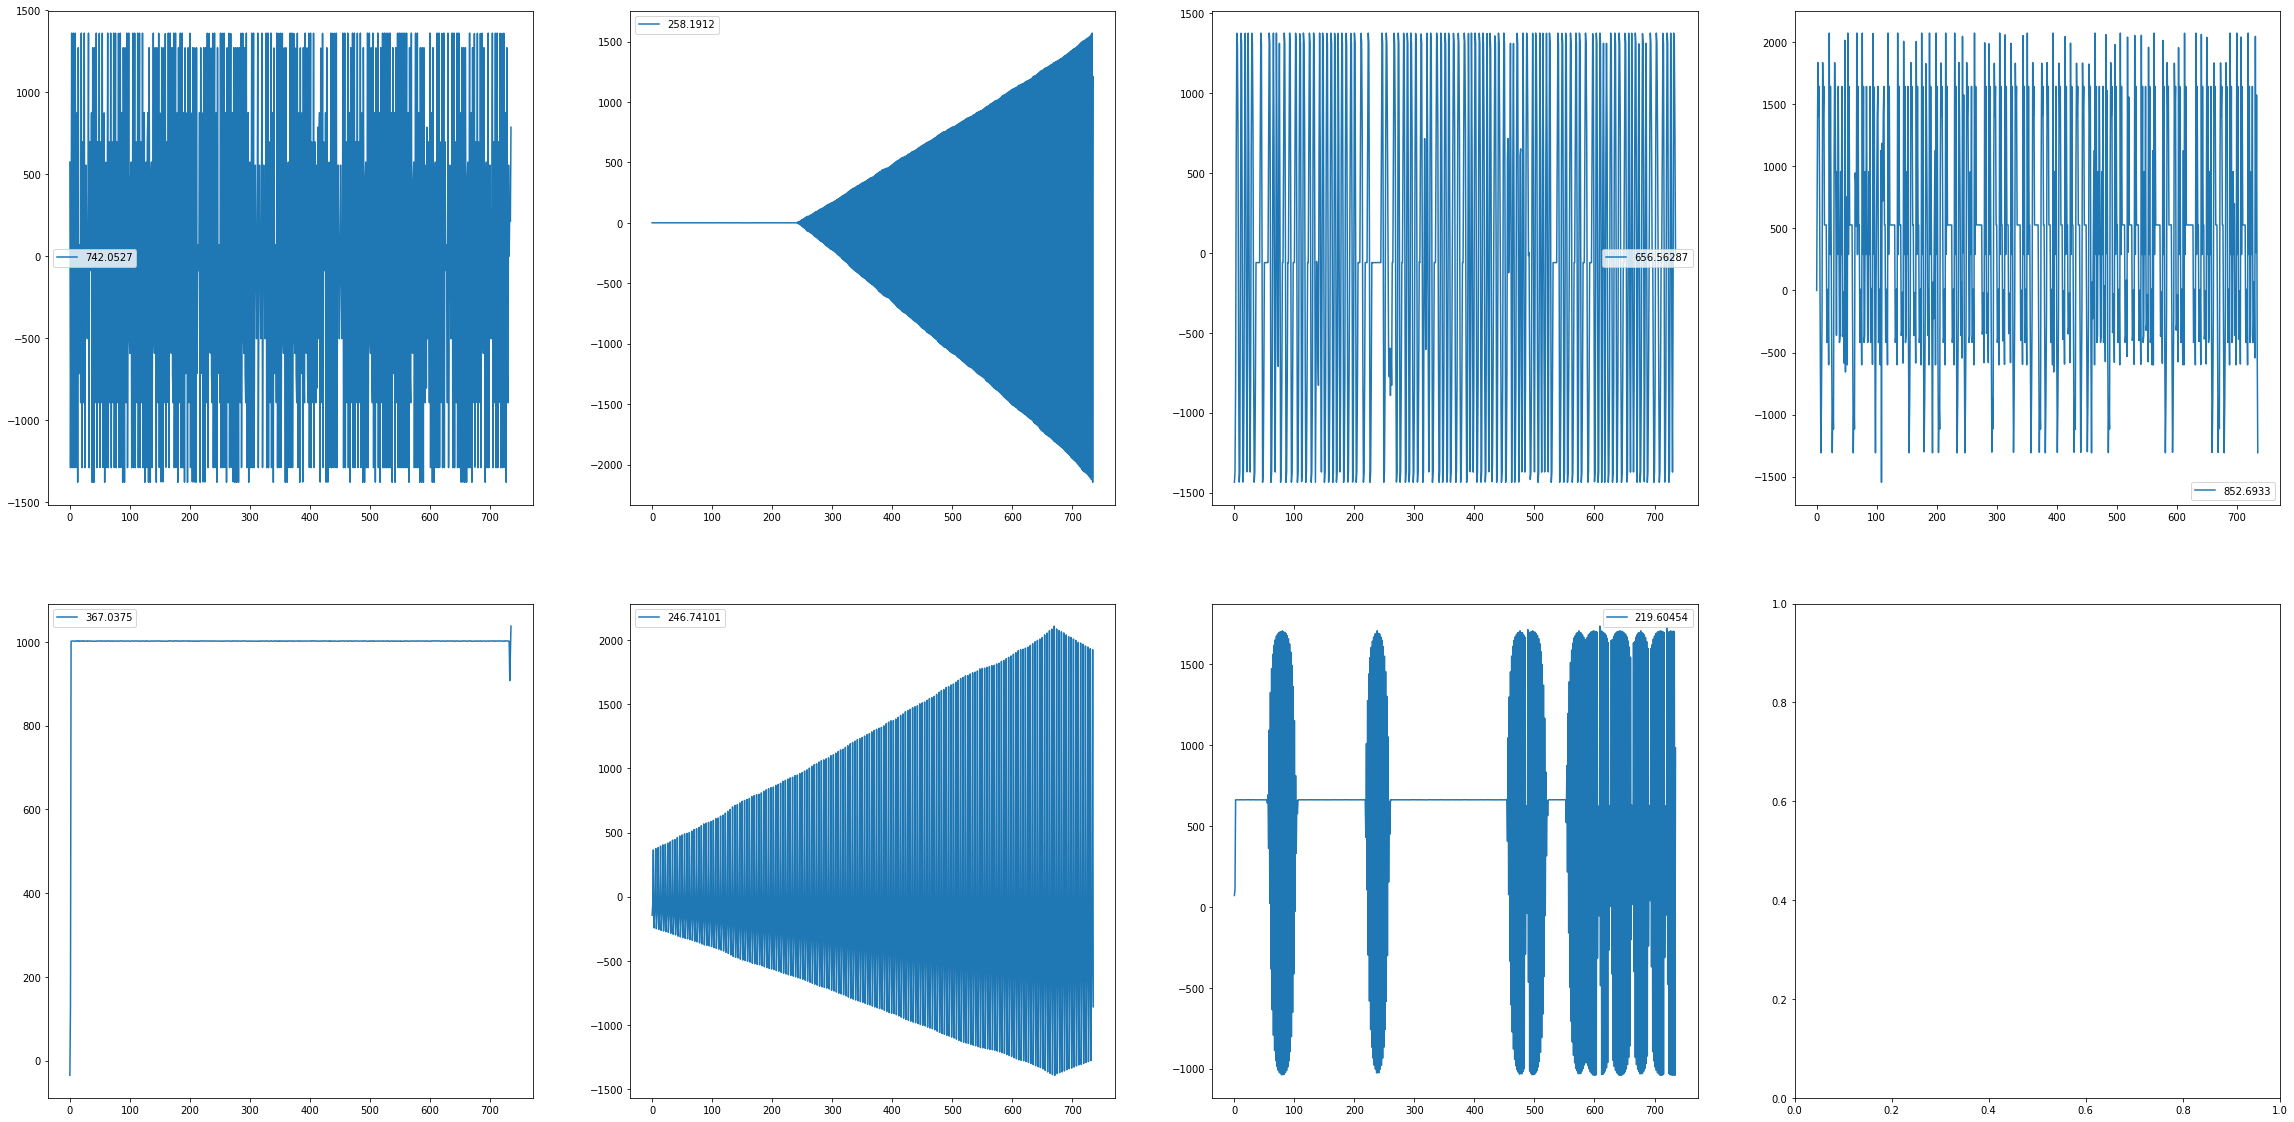

In [11]:
model = load_model('resultsCV/best_models/conv_dense_k5_f8__5f_1_2_25PM_Dec_06_2018-293-5.87.hdf5')

kept_filters = []
for filter_index in range(8):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :])
    else:
        loss = K.mean(layer_output[:, :, filter_index])


    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_prof)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_prof], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_prof_data = np.random.random((1, 1, prof_len))
    else:
        input_prof_data = np.random.random((1, prof_len, 1))
    #input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(1000):
        loss_value, grads_value = iterate([input_prof_data])
        input_prof_data += grads_value * step

        #print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        #img = deprocess_image(input_img_data[0])
        kept_filters.append((input_prof_data[0], loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))
m = len(kept_filters)
fig, ax = plt.subplots(2,4, figsize=(40,20))


for i in range(4):
    ax[0,i].plot(kept_filters[i][0], label=kept_filters[i][1])
    ax[0,i].legend()
for i in range(3):
    ax[1,i].plot(kept_filters[i+4][0], label=kept_filters[i+4][1])
    ax[1,i].legend()

#plt.savefig('greedy.pdf')
plt.show()

Processing filter 0
Filter 0 processed in 1s
Processing filter 1
Filter 1 processed in 0s
Processing filter 2
Filter 2 processed in 1s
Processing filter 3
Filter 3 processed in 1s
Processing filter 4
Filter 4 processed in 1s
Processing filter 5
Filter 5 processed in 1s
Processing filter 6
Filter 6 processed in 1s
Processing filter 7
Filter 7 processed in 1s


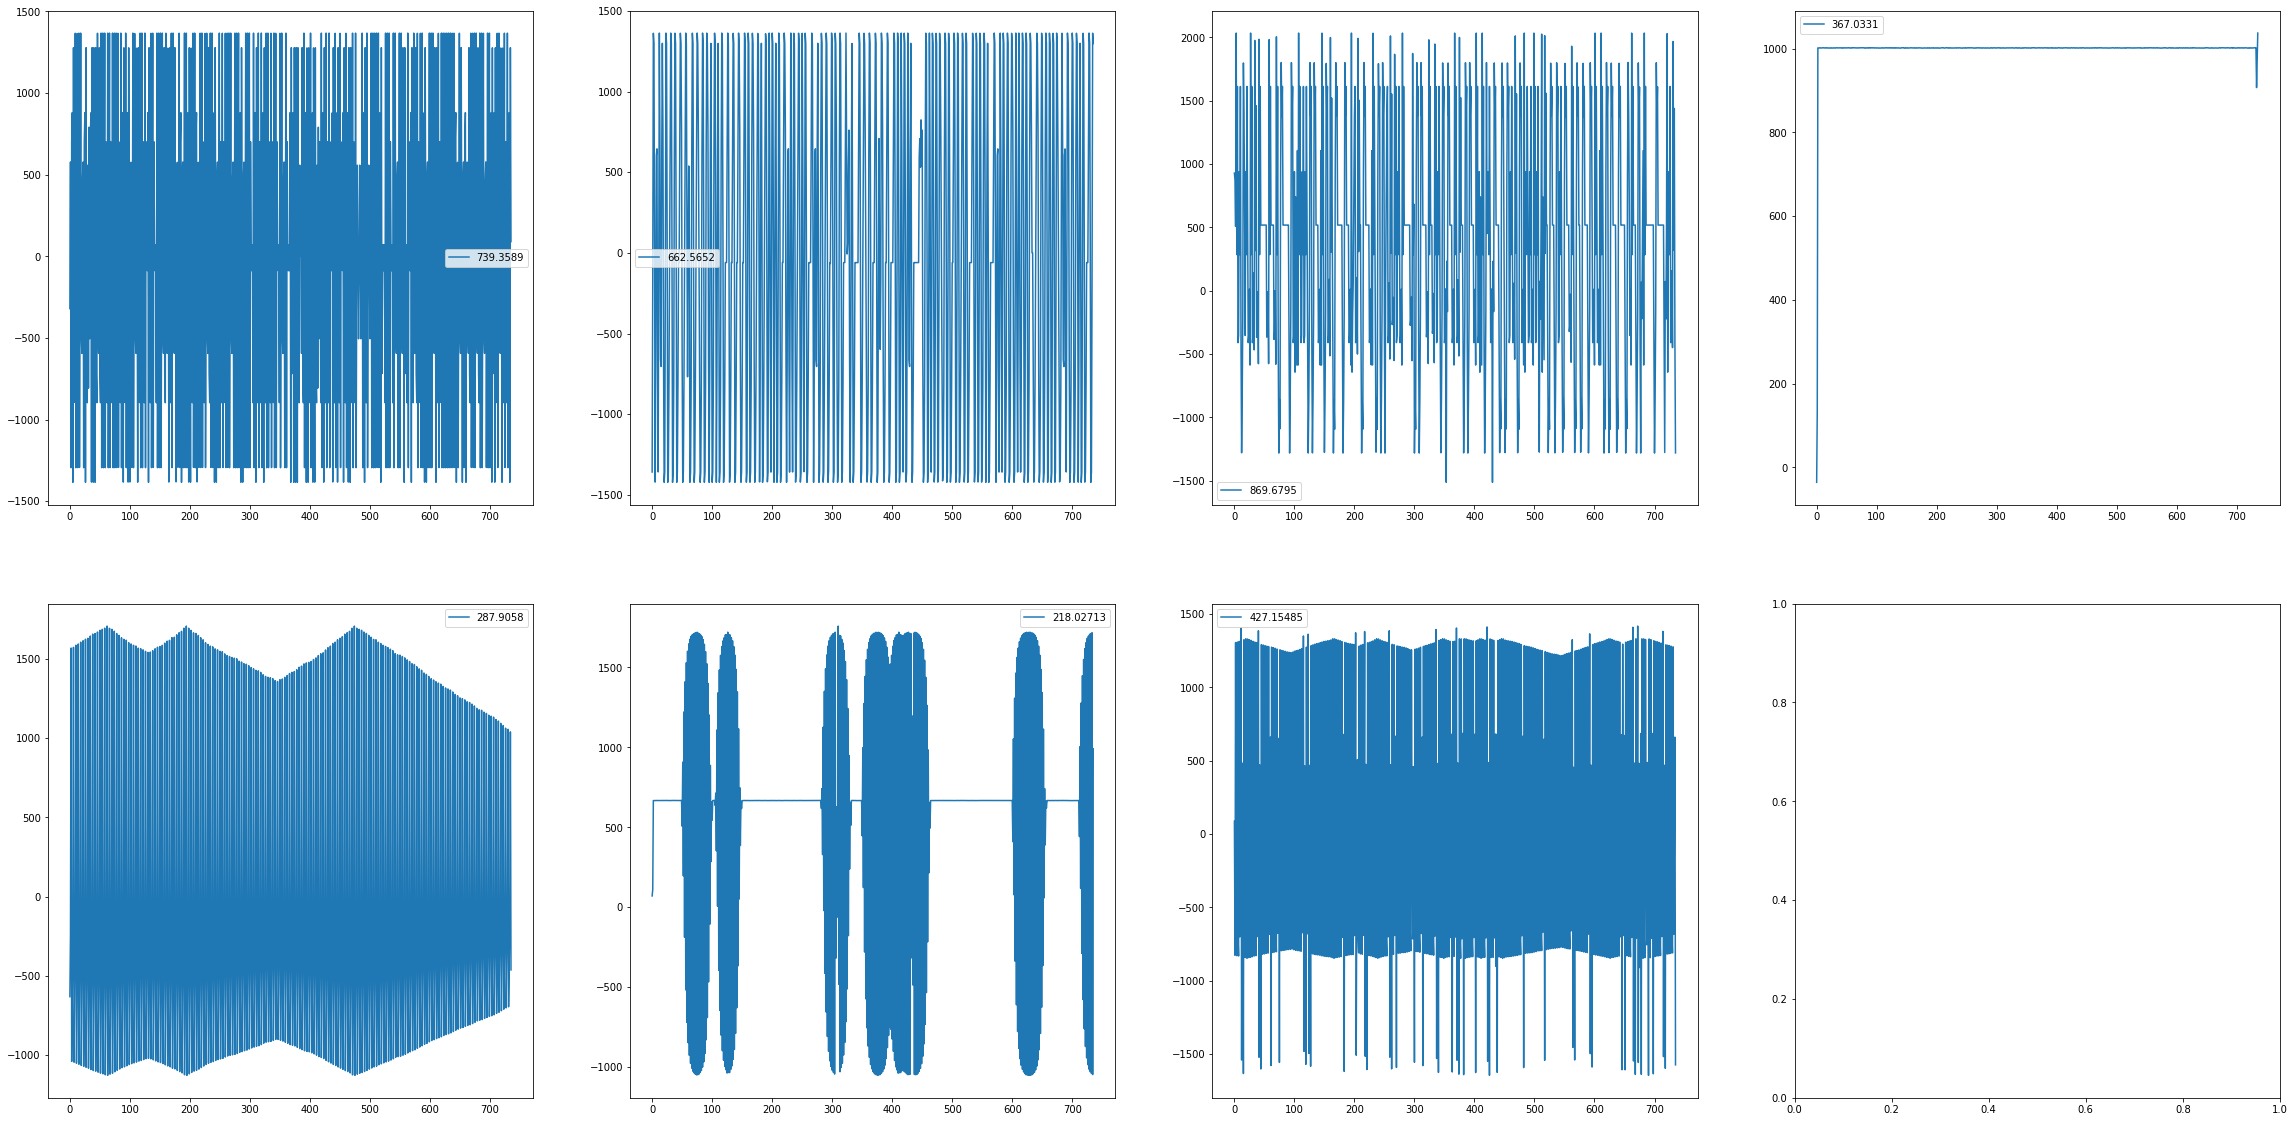

In [12]:
model = load_model('resultsCV/best_models/conv_dense_k5_f8__5f_2_2_38PM_Dec_06_2018-284-2.29.hdf5')

kept_filters = []
for filter_index in range(8):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :])
    else:
        loss = K.mean(layer_output[:, :, filter_index])


    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_prof)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_prof], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_prof_data = np.random.random((1, 1, prof_len))
    else:
        input_prof_data = np.random.random((1, prof_len, 1))
    #input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(1000):
        loss_value, grads_value = iterate([input_prof_data])
        input_prof_data += grads_value * step

        #print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        #img = deprocess_image(input_img_data[0])
        kept_filters.append((input_prof_data[0], loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))
m = len(kept_filters)
fig, ax = plt.subplots(2,4, figsize=(40,20))


for i in range(4):
    ax[0,i].plot(kept_filters[i][0], label=kept_filters[i][1])
    ax[0,i].legend()
for i in range(3):
    ax[1,i].plot(kept_filters[i+4][0], label=kept_filters[i+4][1])
    ax[1,i].legend()

#plt.savefig('greedy.pdf')
plt.show()

Processing filter 0
Filter 0 processed in 1s
Processing filter 1
Filter 1 processed in 0s
Processing filter 2
Filter 2 processed in 1s
Processing filter 3
Filter 3 processed in 1s
Processing filter 4
Filter 4 processed in 1s
Processing filter 5
Filter 5 processed in 0s
Processing filter 6
Filter 6 processed in 1s
Processing filter 7
Filter 7 processed in 1s


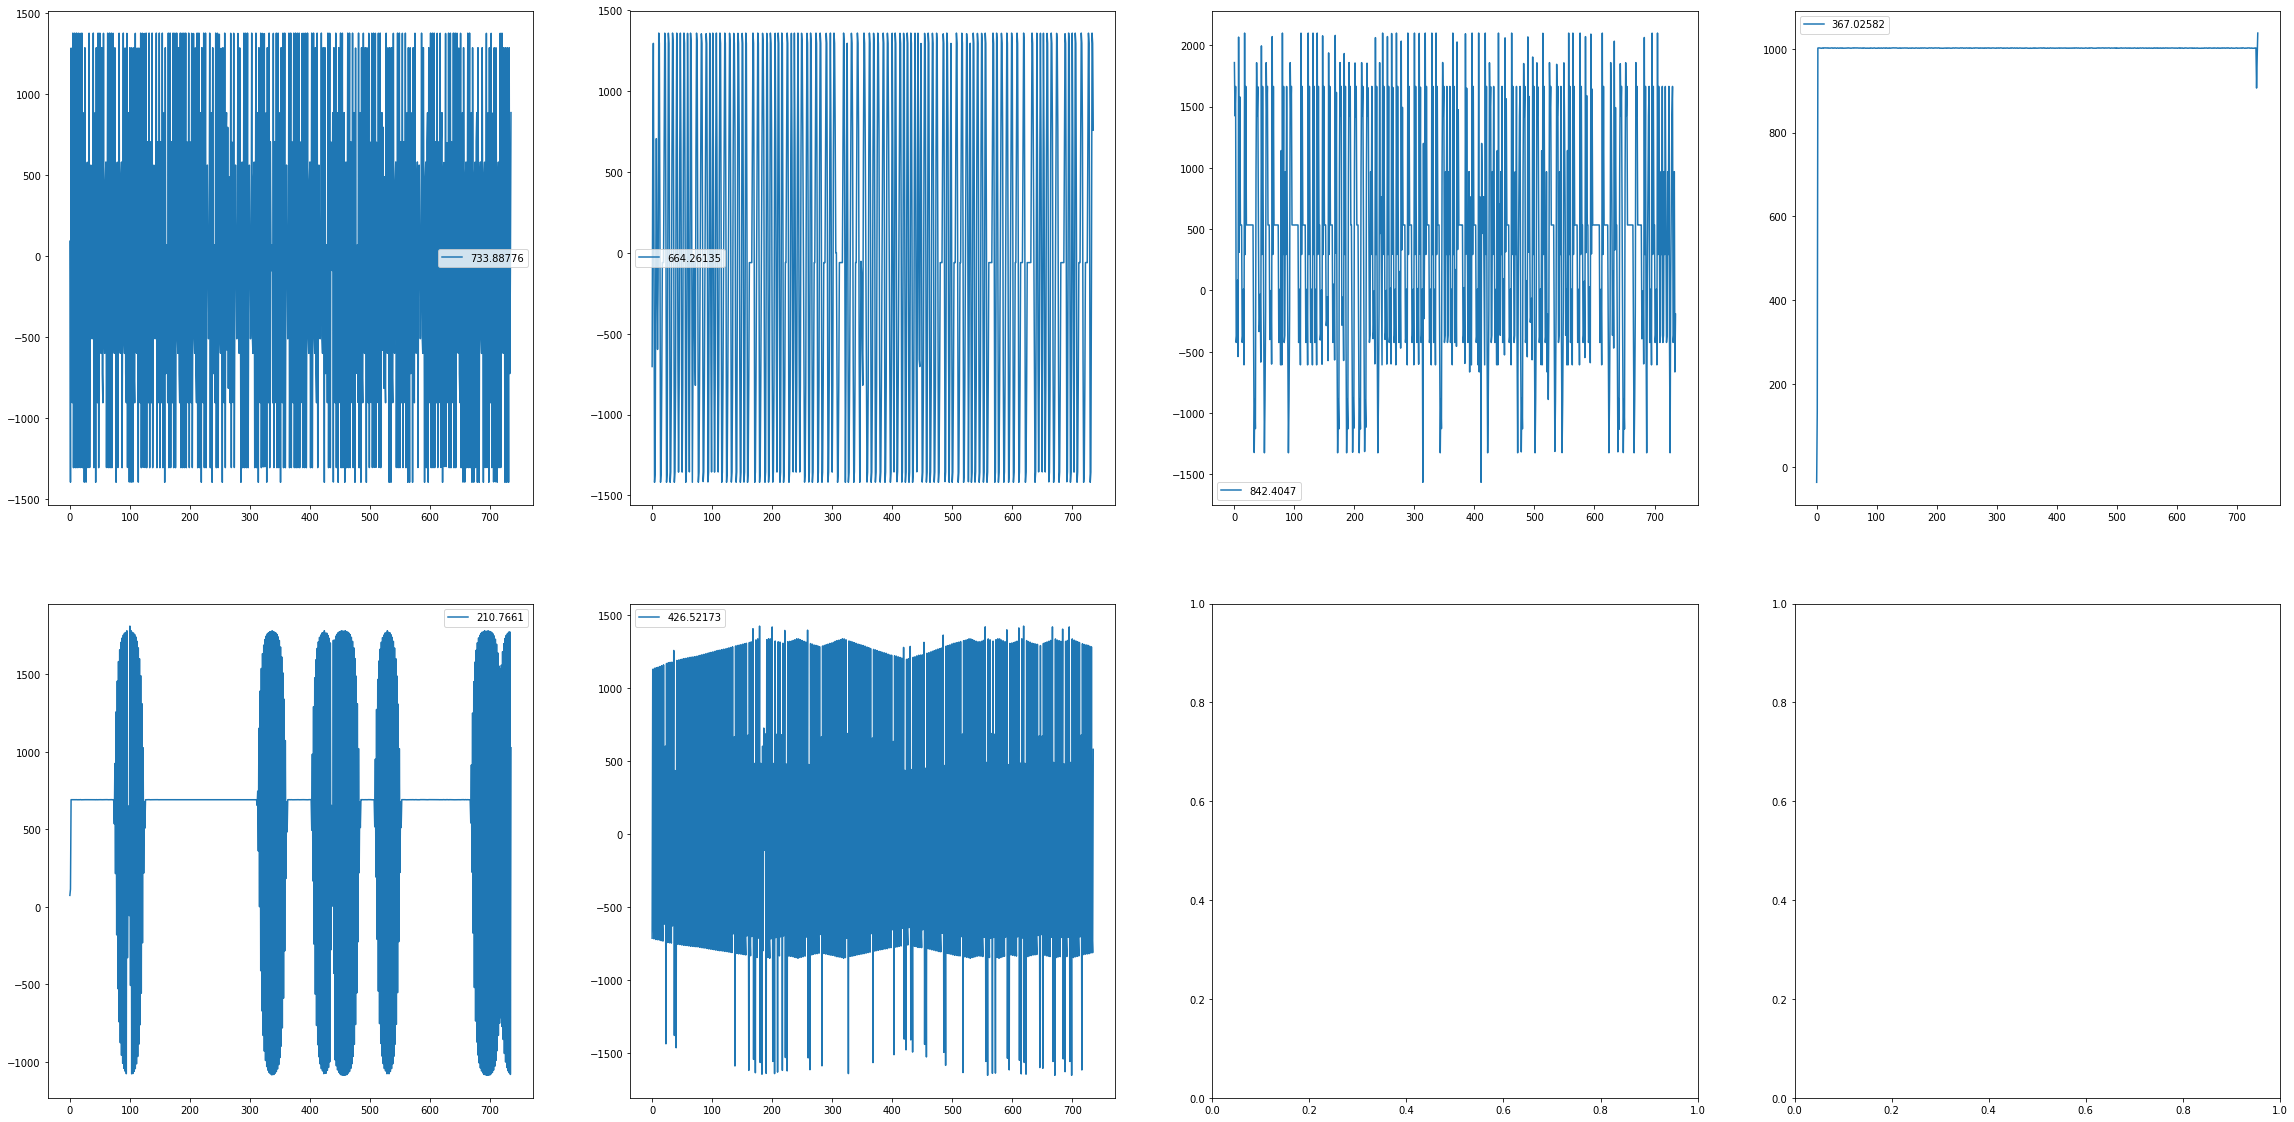

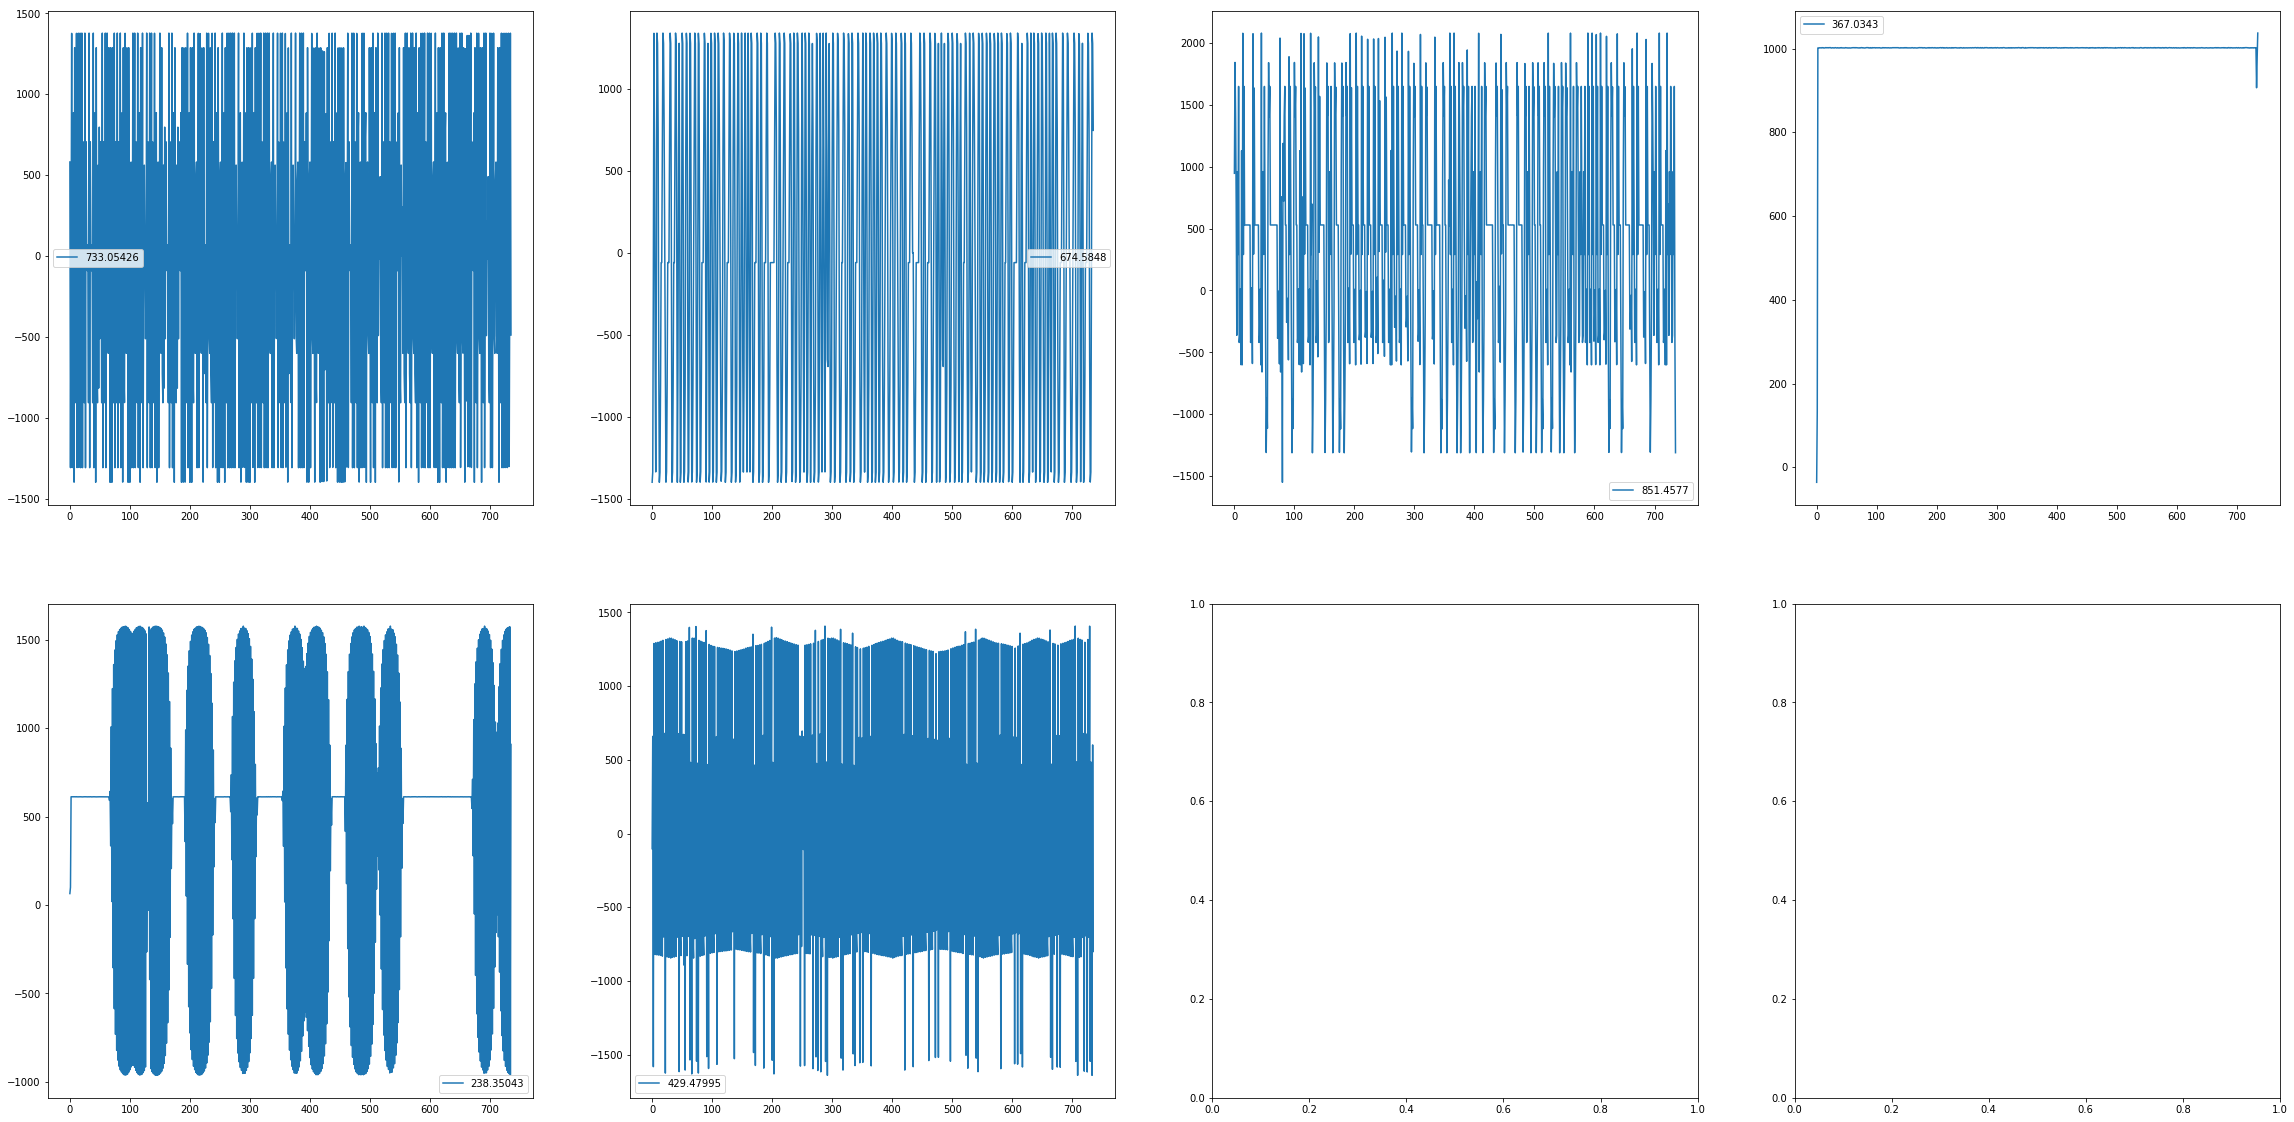

In [15]:
model = load_model('resultsCV/best_models/conv_dense_k5_f8__5f_3_2_50PM_Dec_06_2018-224-0.69.hdf5')

kept_filters = []
for filter_index in range(8):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :])
    else:
        loss = K.mean(layer_output[:, :, filter_index])


    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_prof)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_prof], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_prof_data = np.random.random((1, 1, prof_len))
    else:
        input_prof_data = np.random.random((1, prof_len, 1))
    #input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(1000):
        loss_value, grads_value = iterate([input_prof_data])
        input_prof_data += grads_value * step

        #print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        #img = deprocess_image(input_img_data[0])
        kept_filters.append((input_prof_data[0], loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))
m = len(kept_filters)
fig, ax = plt.subplots(2,4, figsize=(40,20))


for i in range(4):
    ax[0,i].plot(kept_filters[i][0], label=kept_filters[i][1])
    ax[0,i].legend()
for i in range(m-4):
    ax[1,i].plot(kept_filters[i+4][0], label=kept_filters[i+4][1])
    ax[1,i].legend()

#plt.savefig('greedy.pdf')
plt.show()

Processing filter 0
Filter 0 processed in 1s
Processing filter 1
Filter 1 processed in 0s
Processing filter 2
Filter 2 processed in 1s
Processing filter 3
Filter 3 processed in 1s
Processing filter 4
Filter 4 processed in 1s
Processing filter 5
Filter 5 processed in 1s
Processing filter 6
Filter 6 processed in 1s
Processing filter 7
Filter 7 processed in 1s


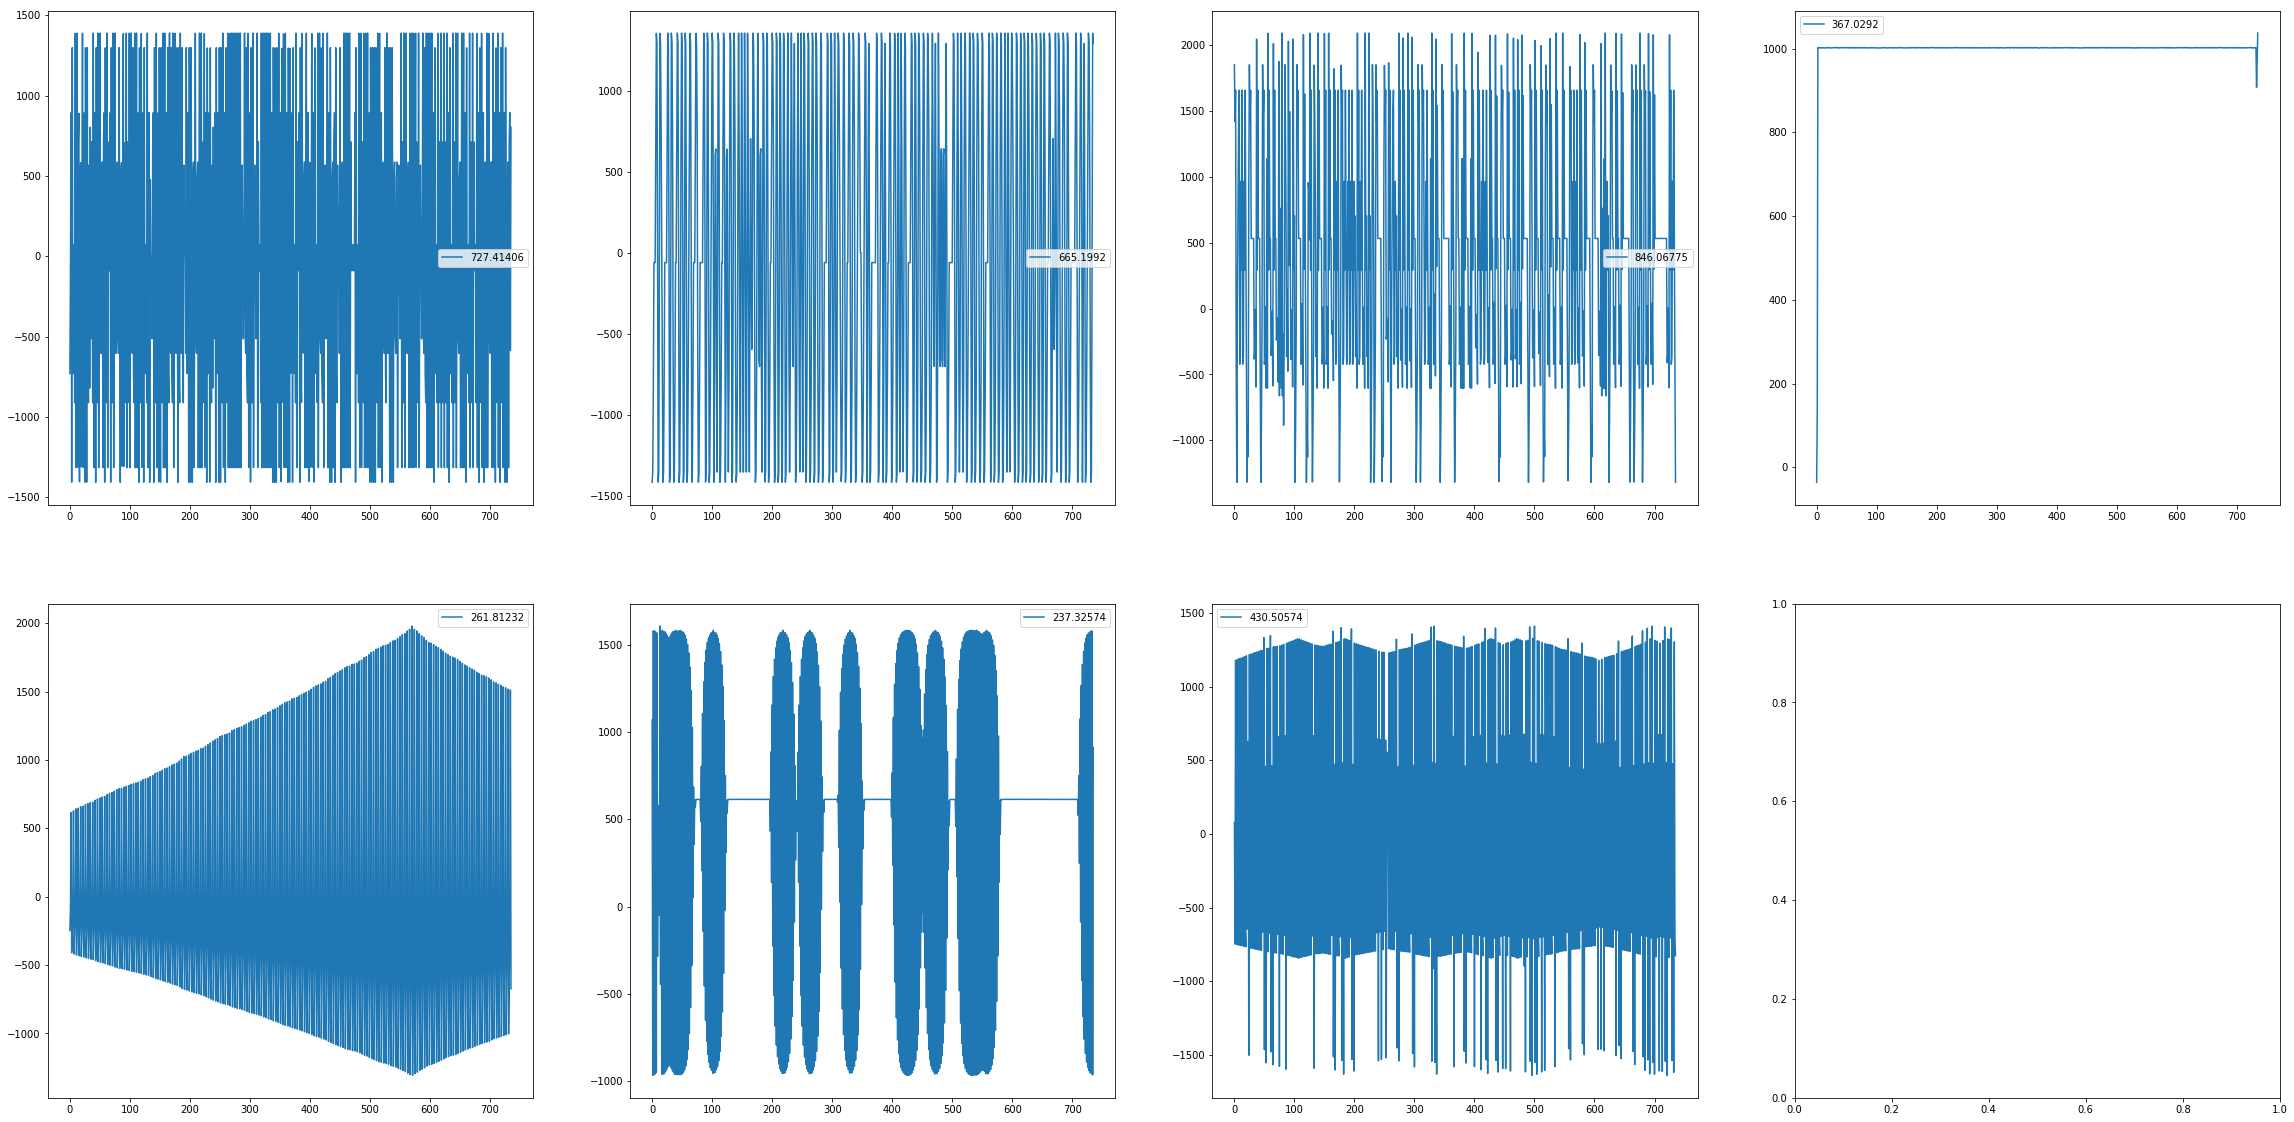

In [16]:
model = load_model('resultsCV/best_models/conv_dense_k5_f8__5f_4_3_01PM_Dec_06_2018-235-1.24.hdf5')

kept_filters = []
for filter_index in range(8):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :])
    else:
        loss = K.mean(layer_output[:, :, filter_index])


    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_prof)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_prof], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_prof_data = np.random.random((1, 1, prof_len))
    else:
        input_prof_data = np.random.random((1, prof_len, 1))
    #input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(1000):
        loss_value, grads_value = iterate([input_prof_data])
        input_prof_data += grads_value * step

        #print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        #img = deprocess_image(input_img_data[0])
        kept_filters.append((input_prof_data[0], loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))
m = len(kept_filters)
fig, ax = plt.subplots(2,4, figsize=(40,20))


for i in range(4):
    ax[0,i].plot(kept_filters[i][0], label=kept_filters[i][1])
    ax[0,i].legend()
for i in range(3):
    ax[1,i].plot(kept_filters[i+4][0], label=kept_filters[i+4][1])
    ax[1,i].legend()

#plt.savefig('greedy.pdf')
plt.show()

Processing filter 0
Filter 0 processed in 1s
Processing filter 1
Filter 1 processed in 0s
Processing filter 2
Filter 2 processed in 1s
Processing filter 3
Filter 3 processed in 1s
Processing filter 4
Filter 4 processed in 1s
Processing filter 5
Filter 5 processed in 1s
Processing filter 6
Filter 6 processed in 1s
Processing filter 7
Filter 7 processed in 1s


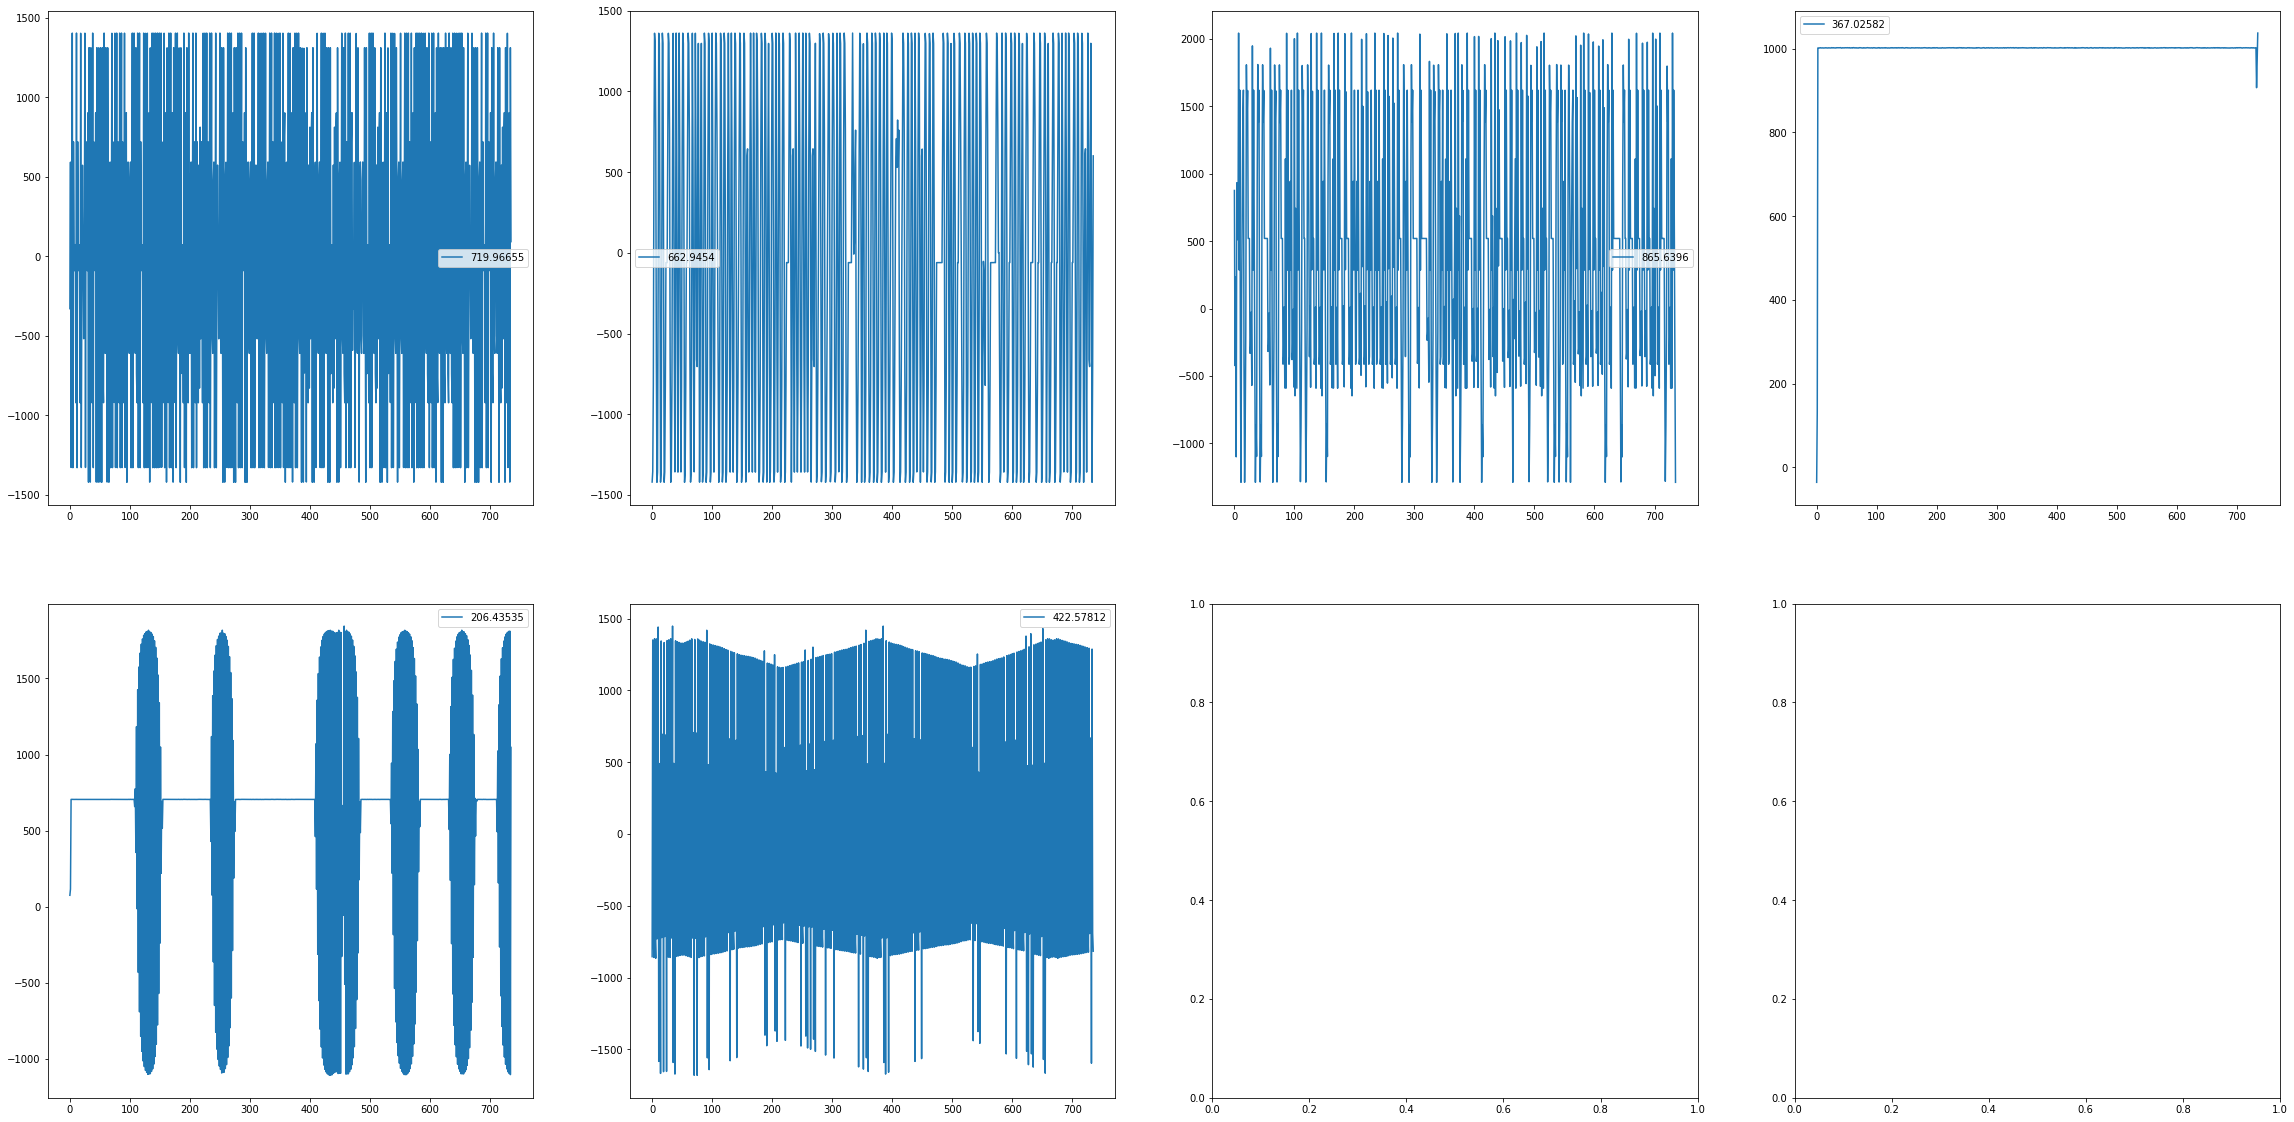

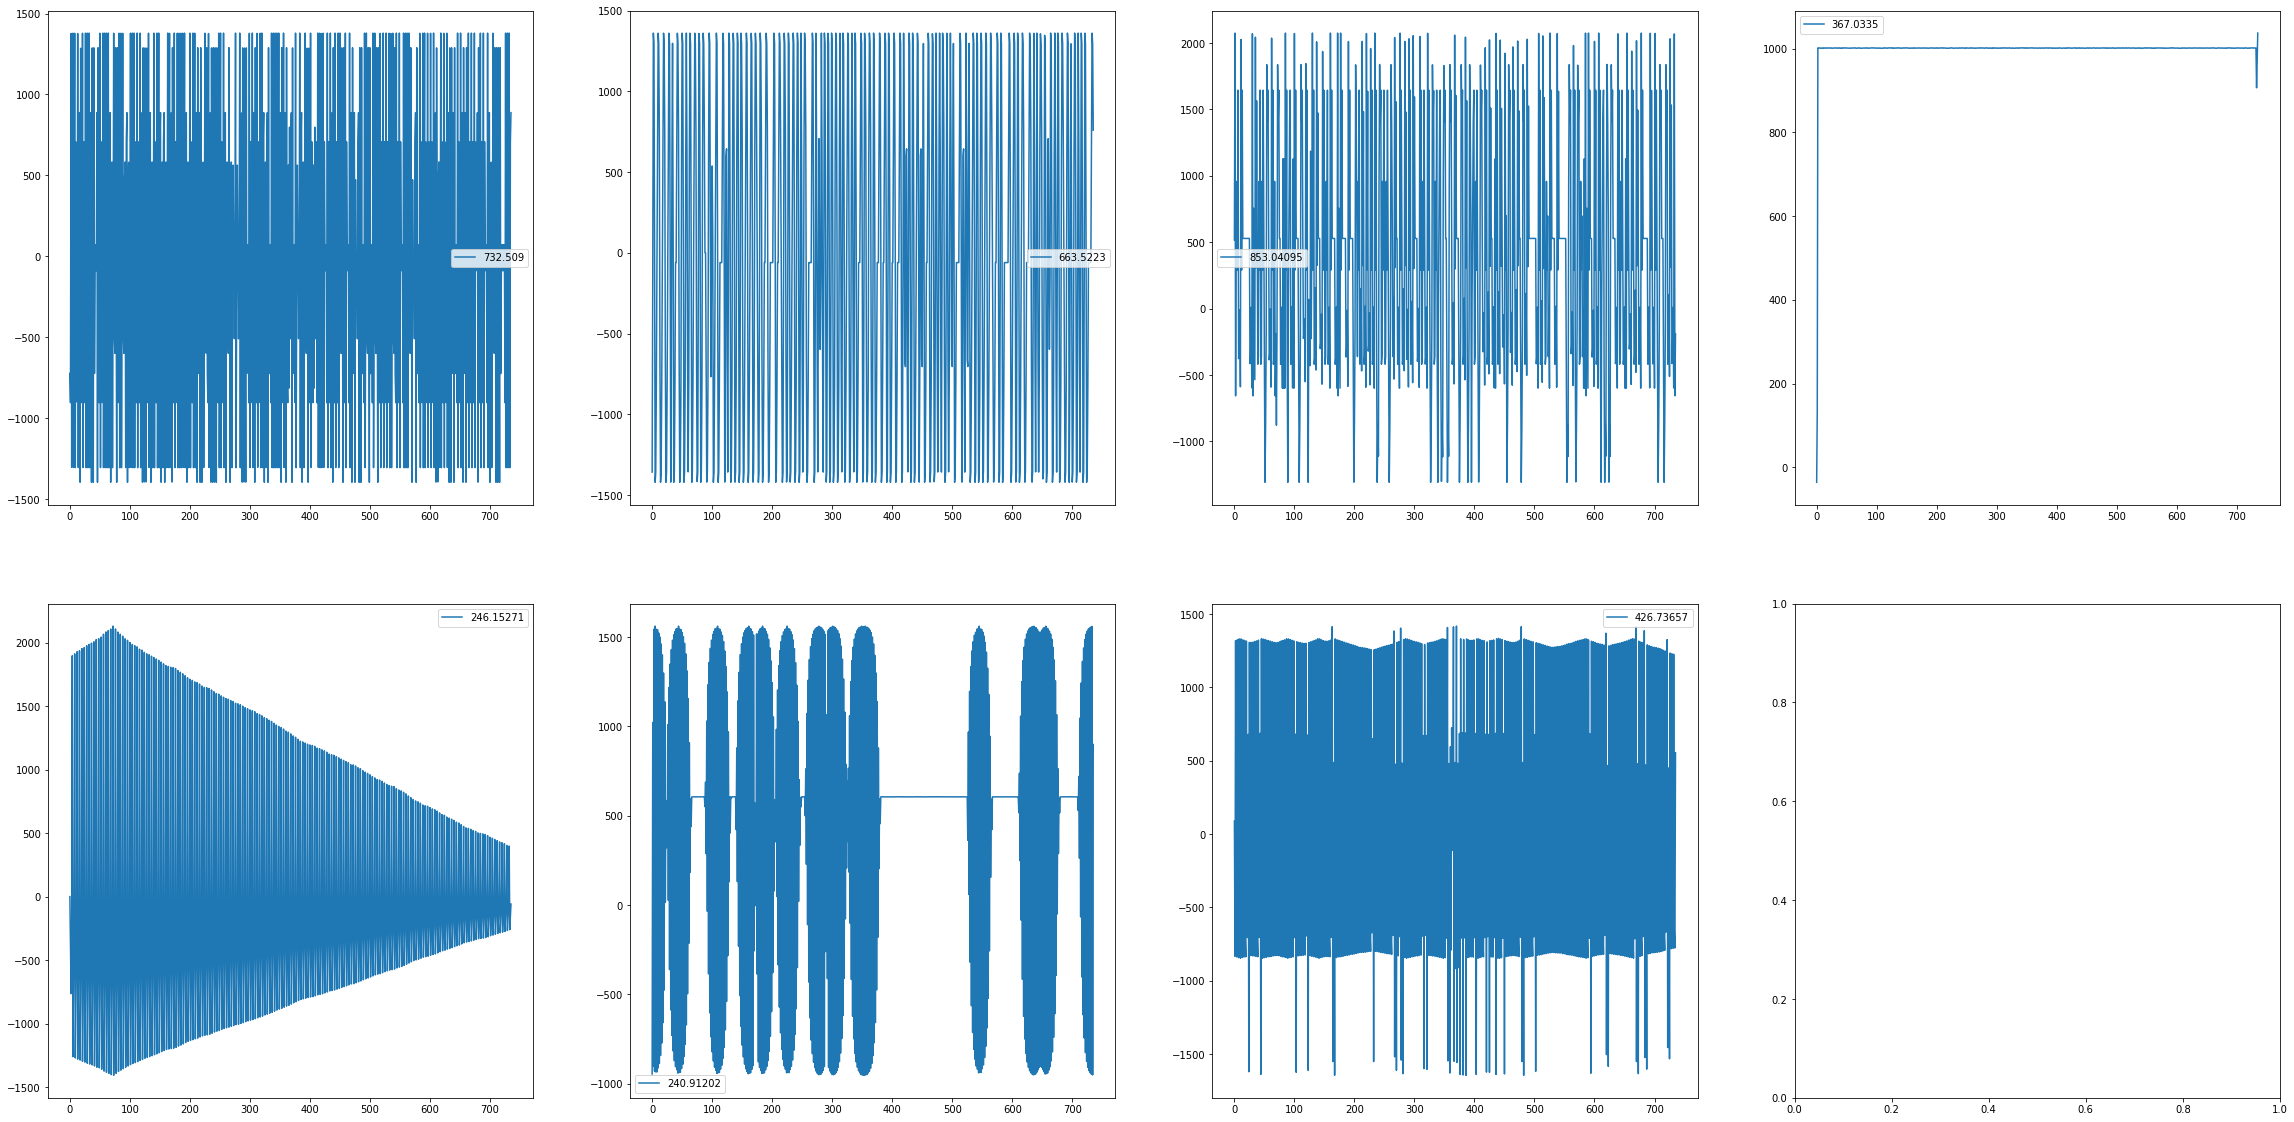

In [18]:
model = load_model('resultsCV/best_models/conv_batch__5f_0_6_40PM_Dec_06_2018-295-35.75.hdf5')

kept_filters = []
for filter_index in range(8):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :])
    else:
        loss = K.mean(layer_output[:, :, filter_index])


    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_prof)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_prof], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_prof_data = np.random.random((1, 1, prof_len))
    else:
        input_prof_data = np.random.random((1, prof_len, 1))
    #input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(1000):
        loss_value, grads_value = iterate([input_prof_data])
        input_prof_data += grads_value * step

        #print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        #img = deprocess_image(input_img_data[0])
        kept_filters.append((input_prof_data[0], loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))
m = len(kept_filters)
fig, ax = plt.subplots(2,4, figsize=(40,20))


for i in range(4):
    ax[0,i].plot(kept_filters[i][0], label=kept_filters[i][1])
    ax[0,i].legend()
for i in range(m-4):
    ax[1,i].plot(kept_filters[i+4][0], label=kept_filters[i+4][1])
    ax[1,i].legend()

#plt.savefig('greedy.pdf')
plt.show()

In [25]:
model = load_model('resultsCV/best_models/conv_batch__5f_3_7_19PM_Dec_06_2018-271-2.90.hdf5')
model.summary()



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        (None, 736, 1)       0                                            
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 736, 8)       48          input_layer[0][0]                
__________________________________________________________________________________________________
max_pooling1d_6 (MaxPooling1D)  (None, 368, 8)       0           conv1d_6[0][0]                   
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 2944)         0           max_pooling1d_6[0][0]            
__________________________________________________________________________________________________
aux_input 

Processing filter 0
Filter 0 processed in 2s
Processing filter 1
Filter 1 processed in 2s
Processing filter 2
Filter 2 processed in 2s
Processing filter 3
Filter 3 processed in 2s
Processing filter 4
Filter 4 processed in 2s
Processing filter 5
Filter 5 processed in 2s
Processing filter 6
Filter 6 processed in 2s
Processing filter 7
Filter 7 processed in 2s


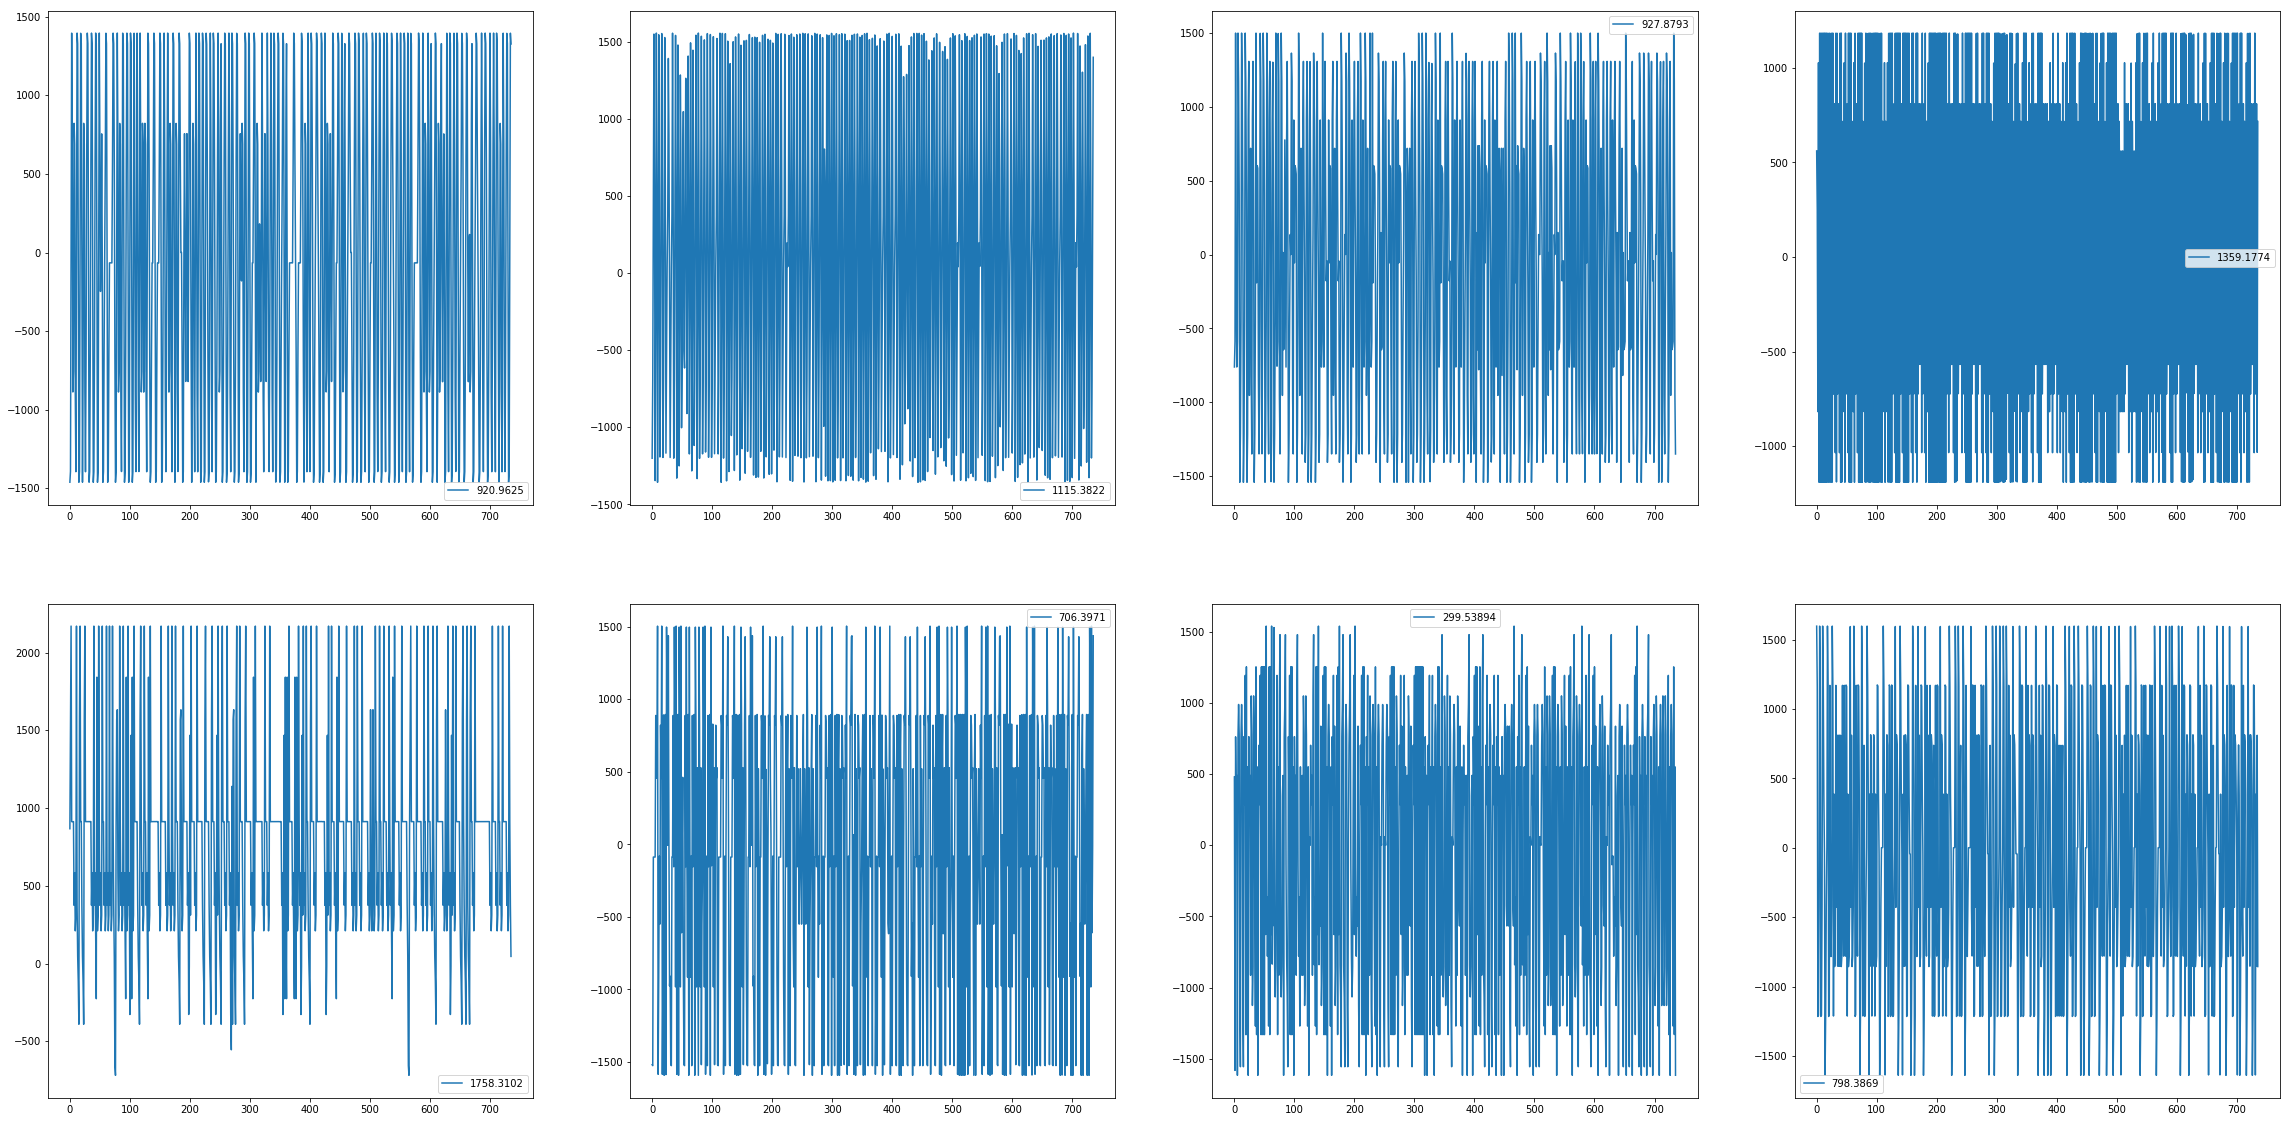

In [26]:
input_prof = model.input[0]
prof_len = 736
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])


layer_name = 'conv1d_6'
def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())



kept_filters = []
for filter_index in range(8):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :])
    else:
        loss = K.mean(layer_output[:, :, filter_index])


    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_prof)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_prof], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_prof_data = np.random.random((1, 1, prof_len))
    else:
        input_prof_data = np.random.random((1, prof_len, 1))
    #input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(1000):
        loss_value, grads_value = iterate([input_prof_data])
        input_prof_data += grads_value * step

        #print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        #img = deprocess_image(input_img_data[0])
        kept_filters.append((input_prof_data[0], loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))
m = len(kept_filters)
fig, ax = plt.subplots(2,4, figsize=(40,20))


for i in range(4):
    ax[0,i].plot(kept_filters[i][0], label=kept_filters[i][1])
    ax[0,i].legend()
for i in range(m-4):
    ax[1,i].plot(kept_filters[i+4][0], label=kept_filters[i+4][1])
    ax[1,i].legend()

#plt.savefig('greedy.pdf')
plt.show()

In [27]:
model = load_model('resultsCV/best_models/conv_dense_k5_f8_l2__5f_8_4_32PM_Dec_09_2018-240-44.77.hdf5')
model.summary()



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        (None, 736, 1)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 736, 8)       48          input_layer[0][0]                
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 368, 8)       0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 2944)         0           max_pooling1d_1[0][0]            
__________________________________________________________________________________________________
aux_input 

Processing filter 0
Filter 0 processed in 2s
Processing filter 1
Filter 1 processed in 2s
Processing filter 2
Filter 2 processed in 2s
Processing filter 3
Filter 3 processed in 2s
Processing filter 4
Filter 4 processed in 2s
Processing filter 5
Filter 5 processed in 0s
Processing filter 6
Filter 6 processed in 2s
Processing filter 7
Filter 7 processed in 0s


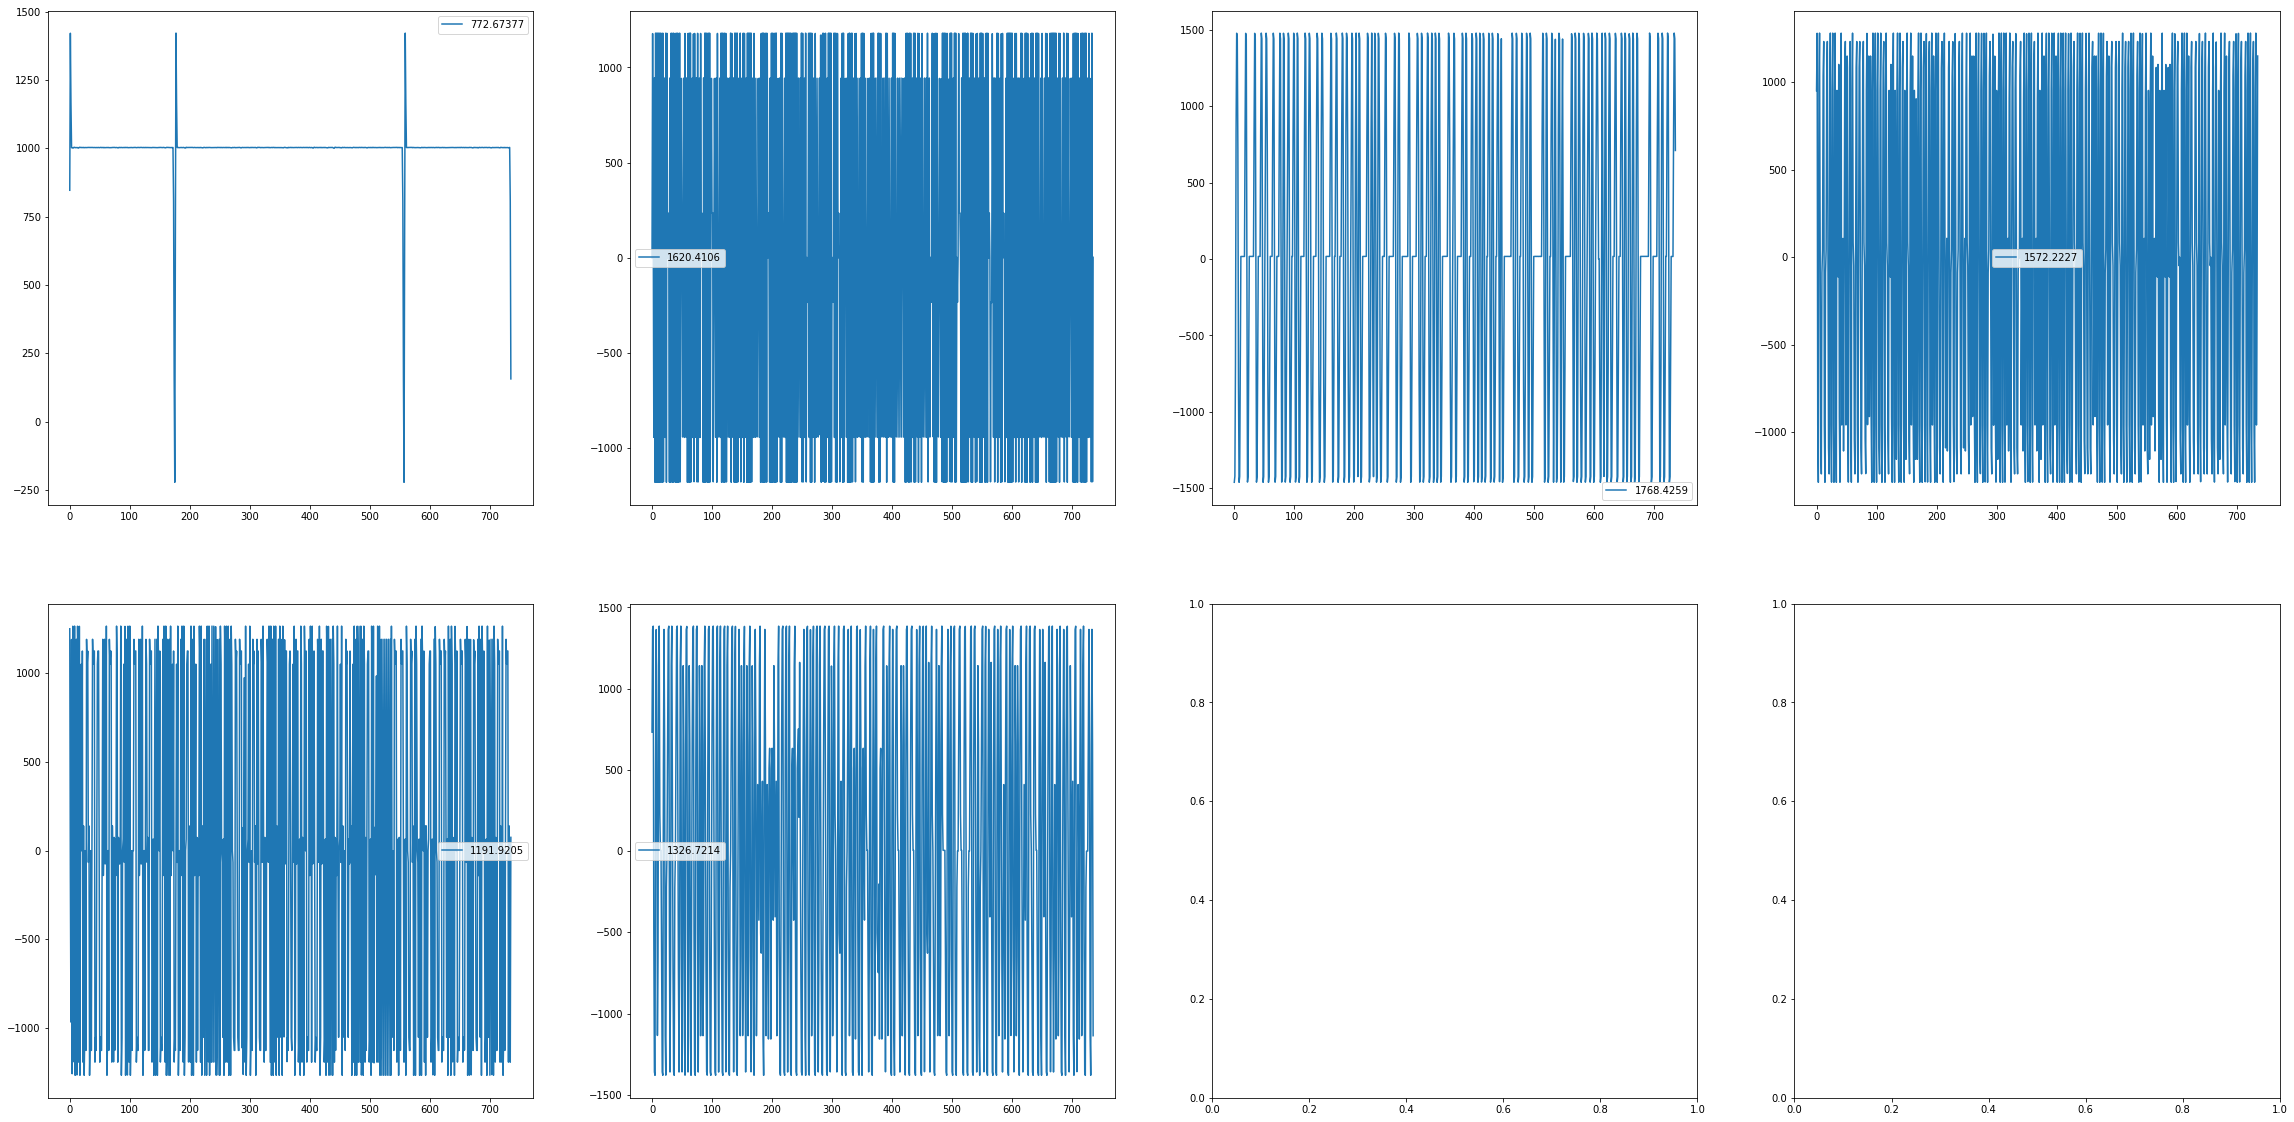

In [29]:
input_prof = model.input[0]
prof_len = 736
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])


layer_name = 'conv1d_1'
def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())



kept_filters = []
for filter_index in range(8):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :])
    else:
        loss = K.mean(layer_output[:, :, filter_index])


    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_prof)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_prof], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_prof_data = np.random.random((1, 1, prof_len))
    else:
        input_prof_data = np.random.random((1, prof_len, 1))
    #input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(1000):
        loss_value, grads_value = iterate([input_prof_data])
        input_prof_data += grads_value * step

        #print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        #img = deprocess_image(input_img_data[0])
        kept_filters.append((input_prof_data[0], loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))
m = len(kept_filters)
fig, ax = plt.subplots(2,4, figsize=(40,20))


for i in range(4):
    ax[0,i].plot(kept_filters[i][0], label=kept_filters[i][1])
    ax[0,i].legend()
for i in range(m-4):
    ax[1,i].plot(kept_filters[i+4][0], label=kept_filters[i+4][1])
    ax[1,i].legend()

#plt.savefig('greedy.pdf')
plt.show()